## Final Project Submission

Please fill out:
* Student name: Pedro Jofre Lora
* Student pace: self paced
* Scheduled project review date/time: 2/14/2019 10:00AM EST
* Instructor name: Eli Thomas
* Blog post URL: https://towardsdatascience.com/write-less-explore-more-7dd39980ed2a


# Modeling King County Housing Prices Using MLR Supported with Cross-Validated RFE.
### Table of Contents
1. [Introduction](#1) <br>
2. [Importing and Cleaning Data](#2) <br>
3. [Exploring and Modifying Data](#3) <br>
4. [Modeling Data](#4) <br>
5. [Interpreting Data](#5)

<a id="1"></a>
## 1. Introduction
The OSEMN framework was used to evaluate the King County Housing Data in order to develop a model that could predict price. Obtaining the data was simple since a comma separated table existed. The data was scrubbed after it was loaded to ensure that it was cast into the correct datatypes. The data was also evaluated for errant data entry, and some transformations were performed in order to make the dataset more useful.<br><br>
Exploratory data analysis was then performed in order to develop a working mental model of the data. This analysis was broken up into three distinct parts that were driven by questions and the results of previous analysis. The exploratory data analysis informed data transformations that were necessary to improve the quality of the resulting model. At the end of EDA, the data was cleaned once more and partially prepped for modeling. <br><br>
Modeling the data was an iterative process. An initial full-feature model was fit in order to set expectations for subsequent models. Recursive Feature Elimination with Cross Validation was then employed to reduce the dimensionality of the data. The resulting model was evaluated for its statistical significance and the quality of the meaning underlying the model. A final model was built from the information gleaned from the RFE model.<br><br>
An interpretation of the model makes it clear that, as the old adage goes, location is the most important predictor of price. Second to location are features that describe the size of the house and a "peer envy" factor that accounts for the size of the house relative to its nearest peers. The remaining important factors can be roughly categorized as conditions that alter the price of the house, such as whether it is a waterfront property, or whether the house has been viewed before.

<a id="2"></a>
## 2. Importing and cleaning data (Obtain and Scrub)
### 2.1 Importing Data

In [256]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

# Import the data
kc = pd.read_csv('kc_house_data.csv', index_col = 'id')
kc.columns = [col_name.title() for col_name in list(kc.columns)]
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
Date             21597 non-null object
Price            21597 non-null float64
Bedrooms         21597 non-null int64
Bathrooms        21597 non-null float64
Sqft_Living      21597 non-null int64
Sqft_Lot         21597 non-null int64
Floors           21597 non-null float64
Waterfront       19221 non-null float64
View             21534 non-null float64
Condition        21597 non-null int64
Grade            21597 non-null int64
Sqft_Above       21597 non-null int64
Sqft_Basement    21597 non-null object
Yr_Built         21597 non-null int64
Yr_Renovated     17755 non-null float64
Zipcode          21597 non-null int64
Lat              21597 non-null float64
Long             21597 non-null float64
Sqft_Living15    21597 non-null int64
Sqft_Lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.5+ MB


In [257]:
pd.DataFrame(
    data = kc.nunique().sort_values(), 
    columns = ['Counts']
    ).transpose()

,Waterfront,Condition,View,Floors,Grade,Bedrooms,Bathrooms,Zipcode,Yr_Renovated,Yr_Built,Sqft_Basement,Date,Long,Sqft_Living15,Sqft_Above,Sqft_Living,Price,Lat,Sqft_Lot15,Sqft_Lot
Counts,2,5,5,6,11,12,29,70,70,116,304,372,751,777,942,1034,3622,5033,8682,9776


In [258]:
kc.describe()

,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Grade,Sqft_Above,Yr_Built,Yr_Renovated,Zipcode,Lat,Long,Sqft_Living15,Sqft_Lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### 2.2 Define problems
1.  Date, View, and Sqft_basement are incorrect types.
2.  Waterfront and zipcode likely need to be converted to categorical.
3.  Condition and Grade might need to be converted to categorical, unless the numbers are a monotonic scale (scale of 1-5 with 5 being the "best").
4.  Investigate Yr_Renovated.
5.  Investigate Sqft_Above, Sqft_Living, and Sqft_basement
6.  Deciding what to do with the date.
7.  Deciding what to do with the lat and long values.
8.  Determine if the house with 33 bedrooms was an entry error.

The reasoning and plan of action for each of these problems is described below.

1. Data could be dropped from View, and it should also be converted to a binary category since the description is "has been viewed", and not "the number of times the propery has been viewed".

2. Waterfront and zipcode may not need to be converted to categorical and could be tossed out if the distributions of the groups is equal. If the distributions are not equal then I'll make a decision about what to do.

3. Condition and Grade likely will not need to be converted to categorical, though we must assume that they are monotonic scales.

4. There is a surprisingly low mean and a very high std for Yr_Renovated, which may indicate that the data may not accurately represent what's going on. It may be the case that very few homes have renovations on file. If this is the case, then Yr_renovated should be changed to Renovated, which is a binary category indicating whether or not a renovation is on file.

5. The metadata for the dataset gives an indication that Sqft_Above and Sqft_Basement may both be accounted for in Sqft_Living. I'll investigate this and remove data if necessary.

6. The date will likely have a large impact on predicting the final sale price. I'll investigate to see if there is an impact, and then decide what to do.

7. Changing Lat and Long data into rectangular sectors can approximate neighborhoods that can then be used as categories. It would be best to look at a map of king county to see if there are distinct neighborhoods that could be drawn instead.

8. There is a house with 33 bedrooms in the dataset. I will drop this datum unless the number of bedrooms is corroborated by the size of the house.


### 2.3 Resolving problems
#### 2.3.1. Change Date and Sqft_Basement to correct types. Drop Data as necessary. Make a separate Basement as a category.

In [259]:
kc.Sqft_Basement.replace(to_replace = '?', 
                         value = np.nan, 
                         inplace = True)
kc.Sqft_Basement = kc.Sqft_Basement.apply(pd.to_numeric)
kc = kc[kc.Sqft_Basement.notnull()]
kc = kc[kc.View.notnull()]
kc.View = kc.View.where(kc.View <= 0, other = 1)
kc['View'] = (kc.View > 0).astype('category')

In [260]:
kc['Basement'] = (kc.Sqft_Basement>0).astype('category')

In [261]:
kc.Date = pd.to_datetime(kc.Date)

#### 2.3.2 Change Waterfront and zipcode to categories if appropriate

In [262]:
waterfront_grouping = kc.groupby(by = 'Waterfront')
waterfront_grouping.groups.keys()

dict_keys([0.0, 1.0])

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

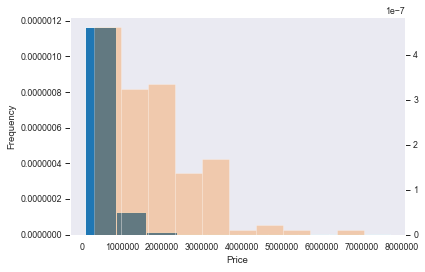

In [264]:
sns.set_style(style = 'dark')
ax1 = waterfront_grouping.get_group(0).Price.plot.hist(density = True)
waterfront_grouping.get_group(1).Price.plot.hist(density = True,
                                            secondary_y = True,
                                            alpha = 0.3,
                                            ax = ax1)
ax1.set_xlabel('Price')
plt.show()

The distributions are clearly different in shape, so waterfront will be converted to a category.

In [265]:
kc.Waterfront.fillna(0.0,inplace = True) # Assume that a null listing means the house is not waterfront
kc.Waterfront = (kc.Waterfront>0).astype('category')

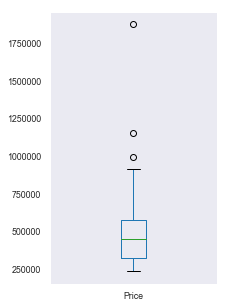

In [266]:
kc.groupby('Zipcode').Price.median().plot.box(figsize = (3,5));

The medians of the groups are too spread out to believe that zipcode might not have a significant impact on the final price of the house. It will be converted to a category.

In [267]:
kc.Zipcode = kc.Zipcode.astype('category')

#### 2.3.3 Changing Grade and Condition to categories.

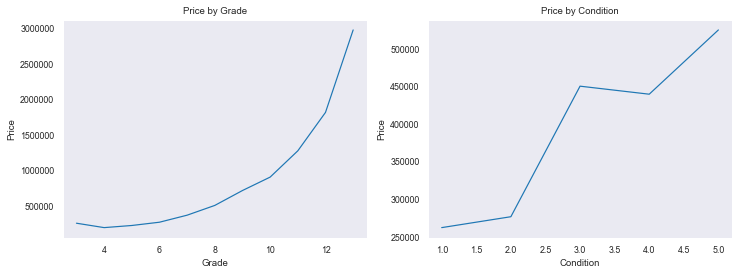

In [268]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
kc.groupby('Grade').Price.median().plot(ax = ax1, title = 'Price by Grade');
kc.groupby('Condition').Price.median().plot(ax = ax2, title = 'Price by Condition')
ax1.set_ylabel('Price')
ax2.set_ylabel('Price')
plt.show()

Price as a function of Condition is not easily approximated by a simple function, though this is odd. I'll investigate price by condition more closely to see if there's a reason behind the deviation.

In [269]:
kc.groupby('Condition').Price.agg(['count','max','min','mean','median'])

,count,max,min,mean,median
Condition,,,,,
1,28,1500000.0,78000.0,337801.785714,262500.0
2,166,2560000.0,80000.0,324541.801205,277000.0
3,13688,7060000.0,82000.0,542820.430523,450650.0
4,5538,7700000.0,89000.0,519579.568978,439972.5
5,1662,3650000.0,110000.0,612872.954272,525444.0


The min and max follow a monotonically increasing trend. The scale is most likely meant to be monotonic, so I'll treat it as such and leave Condition as a numerical feature. 

It is also strange that the lowest value for Grade has a higher price than the two following values for grade. I'll also investigate that further.

In [270]:
kc.groupby('Grade').Price.agg(['count','max','min','mean','median'])

,count,max,min,mean,median
Grade,,,,,
3,1,262000.0,262000.0,2.620000e+05,262000.0
4,27,435000.0,80000.0,2.120019e+05,200000.0
5,235,795000.0,78000.0,2.500485e+05,229950.0
6,1991,1200000.0,82000.0,3.024106e+05,276000.0
7,8762,2050000.0,90000.0,4.023335e+05,375000.0
8,5922,3070000.0,140000.0,5.435257e+05,512250.0
9,2546,2700000.0,230000.0,7.741851e+05,721750.0
10,1108,3600000.0,316000.0,1.071458e+06,910500.0
11,389,7060000.0,420000.0,1.494643e+06,1280000.0


There is only one record for a house with a grade of 3. This record will be eliminated since we don't know if this house is an outlier.

In [271]:
kc.drop(kc.loc[kc.Grade == 3].index, inplace = True)

#### 2.3.4  Change Yr_Renovated to categorical
This is relatively straightforward. The complicated part is that many of the homes have a value of 0.0 for the year renovated, which is nonsensical. It would be good to investigate how many homes have a renovation date on record.

In [272]:
num_unknown_rennovations = kc.Yr_Renovated.replace(to_replace = 0,
                                                   value = np.nan).isna().sum()
num_renovated = (len(kc) - num_unknown_rennovations)
'The number of houses with documented renovations is {0:G}'.format(num_renovated)

'The number of houses with documented renovations is 722'

Since there are so few homes and so many features, I don't think it makes sense to treat this as a continuous variable for those homes that have been renovated.

In [273]:
kc.Yr_Renovated.fillna(0, inplace = True)
kc['Renovated'] = kc.Yr_Renovated.where(kc.Yr_Renovated <= 0, other = 1)
kc['Renovated'] = (kc.Renovated > 0).astype('category')
kc.drop(labels = 'Yr_Renovated', axis = 1, inplace = True)

#### 2.3.5 Exploring Sqft_Living, Sqft_Basement, and Sqft_Above
From the description of the columns, I don't think that we need to keep all three of: Sqft_living, Sqft_Above, and Sqft_Basement. Sqft_Above indicates the area of the house above the basement. It is likely that the sum of the area above the basement and the basement area is almost always the "living area". I'll check this assumption quickly. If this mostly holds true, then I'll drop "living area", if not then I'll drop "above".

In [274]:
print(((kc.Sqft_Above+kc.Sqft_Basement)==kc.Sqft_Living).sum()) #This is the number of houses whose area above and below matches total area
print(len(kc.Price))

21081
21081


How wonderful! It's a perfect match, so I'll drop Sqft_Living since it's accounted for in the sum of basement and above area.

In [275]:
kc.drop('Sqft_Living', axis = 1, inplace = True)

#### 2.3.6 Dealing with the date.

My inclination here is that prices are higher in the summer months because demand is higher. I'll look at a 30 day rolling window to spot trends in the median price, and also resample the data by month to also look for trends.

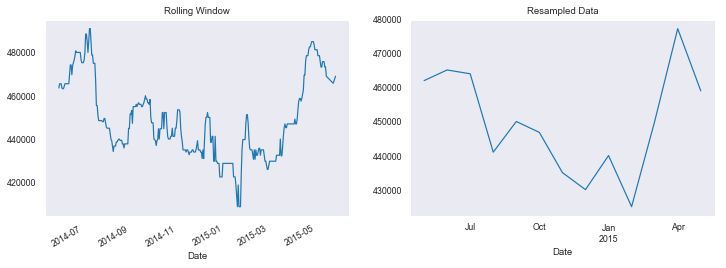

'The maximum swing in adjusted price is 11.61%'

In [276]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
kc.groupby('Date').Price.median().rolling(30).median().plot(ax = ax1, title = 'Rolling Window')
kc.reset_index().set_index(['Date']).resample('m').Price.median().plot(ax = ax2, title = 'Resampled Data')
plt.show()

# Calculate the maximum 'swing' in price as compared to the median
price_adjustment = (kc.reset_index().set_index(['Date']).resample('m').Price.median() / kc.Price.median() - 1)*100
max_swing = price_adjustment.max()-price_adjustment.min()
'The maximum swing in adjusted price is {0:2.2f}%'.format(max_swing)

The maximum swing on the median price is a hefty 11.61%! The model will have to account for the time of the year in order to be more accurate. The easiest way to do this will be to resample by month and then turn into a category. Complexity can be added to the model later by fitting a function to the date, instead of simply categorizing by month.

In [277]:
kc['Month'] = kc.Date.dt.month_name().astype('category')
kc.drop('Date', axis = 1, inplace = True)

#### 2.3.7 Deciding what to do with lat and long values

Here's a map of King County with zip-code boundaries:
<img src="https://www.kingcounty.gov/~/media/operations/GIS/maps/vmc/images/zipcodes_westKC_586.ashx?la=en" alt="An image of King County with zip-code boundaries" title="King Country Zip Codes" />
<br><br><br>
And, for comparison's sake, here's a map of Manhattan with zip-code boundaries:
<img src="https://www.propertyshark.com/Real-Estate-Reports/wp-content/uploads/2012/10/infographic-zip-codes-3.png" alt="An image of Manhattan with zip-code boundaries" title="Manhattan Zip Codes" />

Zip code boundaries trace a mixture of natural boundaries and, I suspect, socioeconomic boundaries. This is corroborated by the Manhattan zipcodes, where neighborhoods are roughly approximated by zip codes (I live in NYC, so I'm more familiar with the neighborhoods here). Though zip codes are not a perfect stand-in for neighborhoods, they are adequate for a first pass at this model. If I have time, I will attend to making discrete quadrants that better capture pricing at the neighborhood level. 


In [278]:
kc.drop(labels = ['Lat', 'Long'], axis = 1, inplace = True)

#### 2.3.8 Investigating the house with 33 bedrooms

I'll look at the data for the house in question to make a decision.

In [279]:
kc.loc[kc.Bedrooms == 33]

,Price,Bedrooms,Bathrooms,Sqft_Lot,Floors,Waterfront,View,Condition,Grade,Sqft_Above,Sqft_Basement,Yr_Built,Zipcode,Sqft_Living15,Sqft_Lot15,Basement,Renovated,Month
id,,,,,,,,,,,,,,,,,,
2402100895,640000.0,33,1.75,6000,1.0,False,False,5,7,1040,580.0,1947,98103,1330,4700,True,False,June


I would find it very difficult to fit 33 bedrooms into 1040 ft$^2$. I'll drop the datum.

In [280]:
kc.drop(labels = kc.loc[kc.Bedrooms == 33].index, inplace = True)
kc.Bedrooms.describe()

count    21080.000000
mean         3.371110
std          0.902101
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: Bedrooms, dtype: float64

A house with 11 bedrooms is plausible.

To finish up importing the data, I'll check the metadata again:

In [281]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21080 entries, 7129300520 to 1523300157
Data columns (total 18 columns):
Price            21080 non-null float64
Bedrooms         21080 non-null int64
Bathrooms        21080 non-null float64
Sqft_Lot         21080 non-null int64
Floors           21080 non-null float64
Waterfront       21080 non-null category
View             21080 non-null category
Condition        21080 non-null int64
Grade            21080 non-null int64
Sqft_Above       21080 non-null int64
Sqft_Basement    21080 non-null float64
Yr_Built         21080 non-null int64
Zipcode          21080 non-null category
Sqft_Living15    21080 non-null int64
Sqft_Lot15       21080 non-null int64
Basement         21080 non-null category
Renovated        21080 non-null category
Month            21080 non-null category
dtypes: category(6), float64(4), int64(8)
memory usage: 2.2 MB


That looks significantly better now. Some series' types could be changed to improve efficiency, but I'm not worried about it at this point since the dataframe is small.

<a id="3"></a>
## 3. Exploring and Modifying Data (Explore)

First, I'll attend to some questions that I have about the neghbors data (`Sqft_Living15` and `Sqft_Lot15`) and make decisions about what to do. Then, I'll look at the zipcode data to determine how to manage it, given that one-hot-encoding will increase the dimensionality of the predictors dramatically. Finally, I'll explore the data for duplicates to ensure that one value is not overrepresented, or that other behaviors are not errantly accounted for.

I will then perform some of the standard investigations with pointed questions to drive my understanding of the data. I am mostly looking to develop a better mental model of the data during this phase so that I can better oversee the modeling process.

Finally, I'll clean up the data one last time before getting ready to prepare it for modeling. I imagine that I will uncover some important information along the way that will prompt me to remove data and perform some encoding.

I will be using ipywidgets throughout to make automate some of the process and make graphs interactive. This should help me answer questions faster.

In [282]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

### 3.1
#### 3.1.1 Analyzing data of neighbors
I am concerned that predictors for the house size and the size of neighboring houses will be highly correlated, which could significantly impact the meaning of the coefficients in an MLR model. I am also concerned that the size of the neighbors houses may not actually be important. **Is the relative difference in size between a house and its neighbors more important than the average absolute size of the neighbors' houses?** I will investigate any colinearity that exists, and then answer my question directly.

In [283]:
kc[['Price','Sqft_Above','Sqft_Lot','Sqft_Living15','Sqft_Lot15']].corr()

,Price,Sqft_Above,Sqft_Lot,Sqft_Living15,Sqft_Lot15
Price,1.000000,0.605493,0.088402,0.586507,0.083535
Sqft_Above,0.605493,1.000000,0.183654,0.730770,0.195984
Sqft_Lot,0.088402,0.183654,1.000000,0.143809,0.719498
Sqft_Living15,0.586507,0.730770,0.143809,1.000000,0.183533
Sqft_Lot15,0.083535,0.195984,0.719498,0.183533,1.000000


As I suspected, the corresponding features are highly correlated. This could spell disaster for the model. The features of the house itself are also more predictive in price than the features of the neighbors houses.  Given the colinearity, I'll transform the data and look at the results again.

In [284]:
# Difference in size is relative to the house of the neighbors
kc['Lot_Difference'] = (kc.Sqft_Lot - kc.Sqft_Lot15)/kc.Sqft_Lot15
kc['Living_Difference'] = (kc.Sqft_Above + kc.Sqft_Basement - kc.Sqft_Living15)/kc.Sqft_Living15
kc[['Lot_Difference','Living_Difference']].describe(percentiles = [.05, .25, .50, .75, .95])

,Lot_Difference,Living_Difference
count,21080.000000,21080.000000
mean,0.134622,0.053155
std,1.293445,0.320528
min,-0.945028,-0.812721
5%,-0.333676,-0.368697
25%,-0.063228,-0.118881
50%,0.000000,0.000000
75%,0.093770,0.161022
95%,0.776977,0.636103
max,86.527179,5.000000


The descriptive data alone tells us that there are outliers in the data. I'll look at scatter plots to see if there is a pattern in the data. If not, I'll look at histograms to determine if binning is appropriate. By looking at layered slices of the data I may be able to determine where the null hypothesis $\mu_{low}$ = $\mu_{mid}$ = $\mu_{high}$ can be rejected in order to make bins.

In [285]:
@interact
def neighbor_scatter(x = ['Lot_Difference','Living_Difference'],
                     scale = ['linear','log']):
    sns.set_context("paper")
    sns.set_style('darkgrid')
    plt.figure(figsize = (10,6))
    sns.scatterplot(x = kc[x], y = kc.Price)
    plt.ylabel('Price',fontdict = {'size':14})
    plt.xlabel(x,fontdict = {'size':14})
    title = 'Price vs ' + x
    plt.title(title, fontdict = {'size':16})
    plt.xlim([-1,5]) # Limiting the window to not see outliers in Lot_Data
    plt.yscale(scale)
    plt.show()

interactive(children=(Dropdown(description='x', options=('Lot_Difference', 'Living_Difference'), value='Lot_Di…

It certainly looks like `Living_Difference` is correlated with log(price)! I can't make out a patter for `Lot_Difference`, so I'll investigate further with histograms sliced by quantiles.

In [286]:
@interact
def neighbor_difference(
              data = ['Lot_Difference', 'Living_Difference'],
              lower_cutoff = (0,0.5,0.05),
              upper_cutoff = (0.5,1,0.05)):
    
    
    # Process the data into slices by quantile
    data_name = data
    data = kc[data]
    data_low = kc.loc[data.loc[(data <= data.quantile(lower_cutoff))].index].Price.dropna()
    data_mid = kc.loc[data.loc[(data > data.quantile(lower_cutoff)) & (data < data.quantile(upper_cutoff))].index].Price.dropna()
    data_high = kc.loc[data.loc[(data >= data.quantile(upper_cutoff))].index].Price.dropna()
    
    
    # Make the plot
    fig, (ax1) = plt.subplots(1,1,figsize = (12,9))
    sns.distplot(data_low.apply(np.log10), kde = True, hist_kws=dict(alpha=0.3), ax = ax1)
    sns.distplot(data_mid.apply(np.log10), kde = True, hist_kws=dict(alpha=0.3), ax = ax1)
    sns.distplot(data_high.apply(np.log10), kde = True, hist_kws=dict(alpha=0.3), ax = ax1)
    title = "Distribution of " + data_name
    n_text = "n Low:{0:d}\nn Mid:{1:d}\nn High:{2:d}".format(len(data_low),len(data_mid),len(data_high))
    ax1.text(0.02, 
             0.9, 
             n_text, 
             horizontalalignment='left',
             verticalalignment='top',
             fontsize = 16,
             transform=ax1.transAxes)
    ax1.set_title(title)
    plt.legend(['Low','Middle','High'], prop = {'size':14})
    plt.show()

interactive(children=(Dropdown(description='data', options=('Lot_Difference', 'Living_Difference'), value='Lot…

It does not appear that a difference in lot size is a good predictor of price even at the extremes of the distributions. It makes sense not to include lot size differences in the final model.
A difference in living area compared to the neighbors does, however, have a pretty significant effect on the price of a house. This is easily visualized by splitting the data into the bottom and top 5%. I'll look at the correlations between `Price` and `Living_Difference` to determine whether it is better to bin the data.

In [287]:
kc.drop(labels = ['Sqft_Living15', 'Sqft_Lot15', 'Lot_Difference'], axis = 1, inplace = True)
temp = kc[['Price','Living_Difference','Sqft_Above']]
temp['log(Price)'] = temp.Price.apply(np.log10)
temp.corr()

,Price,Living_Difference,Sqft_Above,log(Price)
Price,1.000000,0.300698,0.605493,0.892693
Living_Difference,0.300698,1.000000,0.421548,0.304135
Sqft_Above,0.605493,0.421548,1.000000,0.601393
log(Price),0.892693,0.304135,0.601393,1.000000


In [288]:
del temp

The colinearity is reduced, but so is the correlation. This is a hard decision to make, but I know that a colinear predictor may make the model nonsensical later. I'll take the price of reducing colinearity if it affords me the ability to use the variable in the final model. If `Living_Difference` is not included in the final model then I'll add in `Sqft_Living15` back into the model to see if it works.

#### 3.1.2  Managing Zipcode Data
Zipcode is a categorical series with too many unique values to be functionally useful. RFE will take forever if there are too many dummy variables, and deciding which dummy variables to use is somewhat arbitrary and based on the total number of features. __Does it make sense to perform target encoding for the zipcode data?__ I will look at the correlation between the encoded data and the target to make a decision based on that value.

In [289]:
zip_means = kc.groupby('Zipcode')['Price'].mean()
kc['Zipcode_Means'] = kc.Zipcode.map(zip_means)
print('Zipcode Means : Price\t' + str(kc.corr().loc['Zipcode_Means','Price']))

Zipcode Means : Price	0.6392230483040799


The correlation between Zipcode Means and Price is high, so I'll keep the target encoding and drop the Zipcodes. This allows me to use all of the data rather than forcing RFE to cycle through the data. This will help me to understand the final model regardless.

In [290]:
kc.drop('Zipcode', axis = 1, inplace = True)

#### 3.1.2 Investigating Duplicate Data
It may be the case that there is duplicate data. If there is, then I'll investigate it in order to make a decision about what to do. If the data is purely duplicated, then I'll drop it. If not, then I'll form an understanding of what the duplicate data might mean and put a plan in action.

In [291]:
copies = pd.concat(g for _, g in kc.groupby("id") if len(g) > 1)
copies.head(10)

,Price,Bedrooms,Bathrooms,Sqft_Lot,Floors,Waterfront,View,Condition,Grade,Sqft_Above,Sqft_Basement,Yr_Built,Basement,Renovated,Month,Living_Difference,Zipcode_Means
id,,,,,,,,,,,,,,,,,
1000102,280000.0,6,3.00,9373,2.0,False,False,3,7,2400,0.0,1991,False,False,September,0.165049,234512.742424
1000102,300000.0,6,3.00,9373,2.0,False,False,3,7,2400,0.0,1991,False,False,April,0.165049,234512.742424
7200179,150000.0,2,1.00,12750,1.0,False,False,3,6,840,0.0,1925,False,False,October,-0.432432,304805.727969
7200179,175000.0,2,1.00,12750,1.0,False,False,3,6,840,0.0,1925,False,False,April,-0.432432,304805.727969
109200390,245000.0,3,1.75,3900,1.0,False,False,4,7,1480,0.0,1980,False,False,August,-0.191257,283932.361570
109200390,250000.0,3,1.75,3900,1.0,False,False,4,7,1480,0.0,1980,False,False,October,-0.191257,283932.361570
123039336,148000.0,1,1.00,8261,1.0,False,False,3,5,620,0.0,1939,False,False,June,-0.474576,319821.480243
123039336,244900.0,1,1.00,8261,1.0,False,False,3,5,620,0.0,1939,False,False,December,-0.474576,319821.480243
251300110,225000.0,3,2.25,12013,2.0,False,False,3,8,2510,0.0,1988,False,False,July,0.342246,294996.183150


In [292]:
copies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 1000102 to 9834200885
Data columns (total 17 columns):
Price                345 non-null float64
Bedrooms             345 non-null int64
Bathrooms            345 non-null float64
Sqft_Lot             345 non-null int64
Floors               345 non-null float64
Waterfront           345 non-null category
View                 345 non-null category
Condition            345 non-null int64
Grade                345 non-null int64
Sqft_Above           345 non-null int64
Sqft_Basement        345 non-null float64
Yr_Built             345 non-null int64
Basement             345 non-null category
Renovated            345 non-null category
Month                345 non-null category
Living_Difference    345 non-null float64
Zipcode_Means        345 non-null float64
dtypes: category(5), float64(6), int64(6)
memory usage: 37.5 KB


There are 345 duplicate ids, though they are not duplicate entries. It appears that these entries correspond to houses that were purchased and sold within the same calendar year. Some duplicates sold for similar prices, while other duplicates sold for wildly different prices. A large increase in price might correspond with a house that was "flipped". Since there are so few duplicates, I will delete every duplicate entry. This might reduce error in the model that would otherwise arise from not having enough data on whether a house was flipped or not.

In [293]:
kc = kc.reset_index().drop_duplicates(subset = 'id', keep = False)
kc['id'] = kc.id.astype('int')
kc = kc.set_index('id')

### 3.2
Throughout this general investigation I will pose questions to drive my process. There will likely be other questions that come up in the process of the exploration that are not documented, but nonetheless my mental model of the data will improve.
<br>
#### 3.2.1 Exploring Categorical Features with Violin Plots
In general, I'm interested to see if there is a significantly different mean price in a given category. By looking at two categories together I can also see the impact that one category has on another.

A few driving questions include:
1. **Which category has the most significant difference in price between values?**
2. **Are there months that are better for buyers and sellers?**
3. **Are prices higher, lower, or the same if a house has previously been viewed?**

In [294]:
feature_list = list(kc.select_dtypes('category').columns)
hue_list = feature_list.copy()
hue_list.append('None')

In [295]:
@interact
def violin_plot(x=feature_list, 
                yscale = ['log', 'linear'],
                hue = hue_list):
    
    # Select Hue to add depth to violin plots
    if (hue != 'None') & (hue != x):
        title = "Price vs. " + x + " sorted by " + hue
        hue = kc[hue]
    else:
        hue = None
        title = "Price vs. " + x
    
    # Plot Data
    fig, ax = plt.subplots(1,1,figsize = (12,8))
    sns.set_context("paper")
    sns.set_style('darkgrid')
    plot = sns.violinplot(x = kc[x], 
                           y = kc.Price, 
                           cut = 0,
                           scale = 'area',
                           inner = 'box',
                           hue = hue,
                           split = True,
                           ax = ax)
    plt.yscale(yscale)
    plt.title(title, fontsize = 16)
    plt.show()

interactive(children=(Dropdown(description='x', options=('Waterfront', 'View', 'Basement', 'Renovated', 'Month…

1. It appears that Waterfront has the biggest impact on price. The average price of a house on the waterfront is about \$1,000,000 more than the average price of a house otherwise.
2. It's hard to tell from the violin plots if there is a significant difference in price at different times of the year. The rolling window that we calculated before showed that there was, so I will leave it to MLR to determine if it is significant enough.
3. Surprisingly, house prices are *higher* is the house has been viewed.

#### 3.2.2  Distributions of Numerical Features
I'm most interested in seeing which variables I should consider discrete, and which variable I should consider continuous. For the continuous variables I would like to know if they are normally distributed or if they should be transformed to be normally distributed. One question that I certainly have is, **Is log(price) normally distributed?**. I saw that Living_difference had a more linear shape against log(Price), so I'm curious to know what its distribution is.

In [296]:
@interact
def hist_plot(data = list(kc.select_dtypes(include = [np.number]).columns),
             log_data = [False, True]):
    data_label = data
    
    # Transform Data if Necessary.
    if log_data:
        if kc[data].min() < 0:
            data = kc[data] + np.abs(kc[data].min()) + 0.01
            data = data.apply(np.log10)
        else:
            data = kc[data].replace(0,0.1)
            data = data.apply(np.log10)
    else:
        data = kc[data]
    # Plot Data
    fig, ax = plt.subplots(1,1,figsize = (12,8))
    title = "Distribution of " + data_label
    sns.distplot(data,
                 ax = ax)
    plt.title(title)
    plt.show()

interactive(children=(Dropdown(description='data', options=('Price', 'Bedrooms', 'Bathrooms', 'Sqft_Lot', 'Flo…

Price, Sqft_Lot, Sqft_Above, Sqft_Basement, and Living_Difference all behave as continuous predictors, like expected. The remainder are discrete predictors. Log(Price) is certainly more normal than Price, so I'll likely end up transforming it later on.

#### 3.2.3 Exploring Relationships of Numerical Features using Scatter Plots
There are two separate explorations that I want to perform: one for the discrete data and one for the continuous data. The driving question here is, **What transformations are necessary so that there is a linear relationship between a predictor and the target?**
<br>
One thing that I'm curious to explore are fits for discrete data based on the median at each value. This will give me a better sense of the function that best fits each curve, which I can leverage to linearize the data before I run MLS. I can use this technique if I assume that the distgribution of the target data for each discrete value of a predictor has the same shape.
<br>
For both explorations I will calculate and print the correlation between the variables in order to make a decision about how best to linearize the data.

In [297]:
discrete_predictors = ['Bedrooms','Bathrooms','Floors','Condition','Grade','Yr_Built','Zipcode_Means']
continuous_predictors = [ 'Sqft_Lot', 'Sqft_Above', 'Sqft_Basement', 'Living_Difference']

In [298]:
@interact
def discrete_plot(x = discrete_predictors,
                  y_function = ['linear', 'log'],
                  x_function = ['linear', 'log', 'squared', 'square-root', 'exp'],
                  yr_shift = (1950,1970,.25),
                  quantile = (0.1,0.9,0.05)):
    
    # Find the value at a specific quantile
    df = pd.DataFrame(kc.groupby(x).Price.quantile(quantile)).reset_index()
    xlabel = x
    x = df[x]
    y = df.Price
    
    # Transform the data
    def function_mapping(data, function):
        function_map = {'linear':data,
                            'log':data.apply(np.log10), 
                            'squared':data.apply(np.square),
                            'square-root':(data-yr_shift).apply(np.lib.scimath.sqrt).apply(np.abs), 
                            'exp':data.apply(np.exp)}
        return function_map[function]
    
    x = function_mapping(x,x_function)
    y = function_mapping(y,y_function)
    
    # Plot and show labels
    fig, ax = plt.subplots(1,1,figsize = (12,8))
    corr = np.corrcoef(x,y)
    corr_text = 'corr: {:1.3f}'.format(corr[1,0])
    sns.scatterplot(x = x, y = y, s = 100)
    plt.text(.025, 
             0.95, 
             corr_text, 
             horizontalalignment='left',
             verticalalignment='top',
             fontsize = 16,
             transform=ax.transAxes)
    ylabel = str(quantile*100) + 'th percentile Price'
    plt.ylabel(ylabel,fontdict = {'size':14})
    plt.xlabel(xlabel,fontdict = {'size':14})
    title = ylabel +  ' vs ' + xlabel
    plt.title(title, fontdict = {'size':16})
    plt.show()
    

interactive(children=(Dropdown(description='x', options=('Bedrooms', 'Bathrooms', 'Floors', 'Condition', 'Grad…

It appears that taking the log of the price data helps linearize overall. This also helps because the distribution of the price data is normal when it is log transformed. The following relationships have the best correlation values and dont produce a pattern in the residuals:

| Linear Relationship                 | Correlation Value |
| ---------------------------- | :---------------: |
| log(Price) ~ log(Bedrooms)   | 0.871             |
| log(Price) ~ Bathrooms       | 0.864             |
| log(Price) ~ Condition       | 0.931             |  
| log(Price) ~ $Grade^2$       | 0.998             |
| log(Price) ~ $\sqrt{Yr\_Built-1961.5}$ | 0.709    |
| log(Price) ~ log(Zipcode)    | 0.992             |

Floors had huge variability depending on the quantile that was used, so the assumption that I'm using doesn't hold true.

In [299]:
@interact
def scatter_plot(x = continuous_predictors,
                 x_function = ['linear', 'log', 'squared', 'square-root', 'exp'],
                 hue = ['None', 'Waterfront', 'View', 'Basement', 'Renovated']):
    
    fig, ax = plt.subplots(1,1,figsize = (12,8))
    def function_mapping(data, function):
        function_map = {'linear':data,
                            'log':data.apply(np.log10), 
                            'squared':data.apply(np.square),
                            'square-root':data.apply(np.sqrt), 
                            'exp':data.apply(np.exp)}
        return function_map[function]
    x_data = kc[x] + np.abs(kc[x].min()) + 0.001
    x_data = function_mapping(x_data,x_function)
    y_data = kc.Price
    y_data = y_data.apply(np.log10)
        
    if (hue != 'None'):
        hue = kc[hue]
    else:
        hue = None
    
    corr = np.corrcoef(x_data,y_data)
    corr_text = 'corr: {:1.3f}'.format(corr[1,0])
    plt.text(.025, 
             0.95, 
             corr_text, 
             horizontalalignment='left',
             verticalalignment='top',
             fontsize = 16,
             transform=ax.transAxes)
    
    sns.scatterplot(x = x_data, y = y_data, hue = hue, ax=ax)
    plt.show()

interactive(children=(Dropdown(description='x', options=('Sqft_Lot', 'Sqft_Above', 'Sqft_Basement', 'Living_Di…

While not transforming the predictors yields the best correlation values, I'm concerned that there will be a non-random pattern in the residuals if they're left alone. Log transforming Sqft_Above and taking the square root of Sqft_Basement is more likely to yield a random residual pattern in both. This relationship and the correlation values is shown below.

|Linear Relationship|Correlation Value|
|---|---|
|log(Price) ~ log(Sqft Above)| 0.586 |
|log(Price) ~ $\sqrt{SqftBasement}$ | 0.374 |
|log(Price) ~ $\sqrt{Living Difference}$ | 0.310 |

The correlation for Sqft_Lot is so low that I don't think it's worth it to include it in the model. 

#### 3.2.4 Correlations of Numerical Features
I can investigate the best correlations now that I know the transformations to make each predictor as linear as possible to the target. I will create a function to make a new dataframe with the linearized data, and then I will look at the correlation matrix.

| Linear Relationship                 | Correlation Value |
| ---------------------------- | :---------------: |
| log(Price) ~ log(Bedrooms)   | 0.871             |
| log(Price) ~ Bathrooms       | 0.864             |
| log(Price) ~ Condition       | 0.931             |  
| log(Price) ~ $Grade^2$       | 0.998             |
| log(Price) ~ $\sqrt{Yr\_Built-1961.5}$ | 0.709    |
| log(Price) ~ log(Zipcode)    | 0.992             |
|log(Price) ~ log(Sqft Above)| 0.586 |
|log(Price) ~ $\sqrt{SqftBasement}$ | 0.374 |
|log(Price) ~ $\sqrt{Living Difference}$ | 0.310 |

In [300]:
def transform_data(df):
    df_transformed = df.copy()
    transform = {'Price':np.log10,
                 'Bedrooms':np.log10,  
                 'Grade':np.square,
                 'Sqft_Above':np.log10, 
                 'Sqft_Basement':np.sqrt,
                 'Zipcode_Means':np.log10}
    
    # For simple transformations
    for column in list(df.columns):
        if column in transform.keys():
            df_transformed[column] = df_transformed[column].apply(transform[column])
    
    # Transform Living Difference
    df_transformed['Living_Difference'] = df_transformed.Living_Difference + np.abs(df_transformed.Living_Difference.min())
    df_transformed['Living_Difference'] = df_transformed.Living_Difference.apply(np.sqrt)
    
    # Transform Yr_Built
    df_transformed.Yr_Built = (df_transformed.Yr_Built-1961.5).apply(np.lib.scimath.sqrt).apply(np.abs)
    
    return df_transformed
    

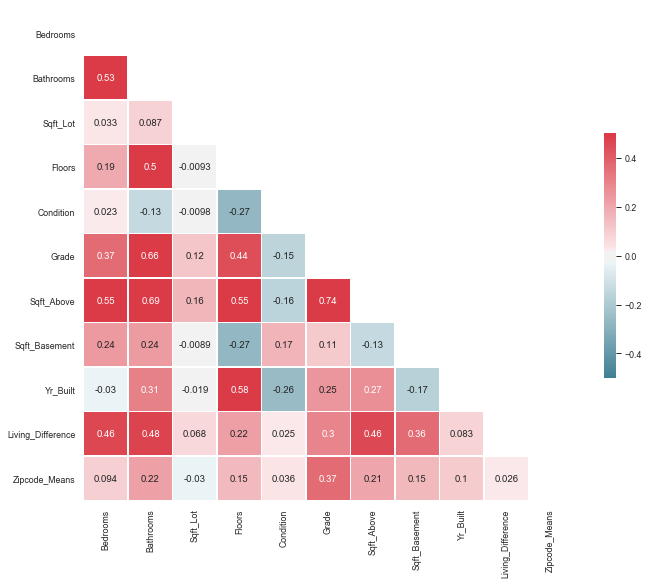

In [301]:
sns.set_style('white')
corr = transform_data(kc.drop(labels = 'Price', axis = 1)).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, vmin = -0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()
sns.set_style()

The correlation matrix does show that many of these variables correlate with each other. I'm not surprised by this. After all, a more expensive house tends to have more bedrooms, bathrooms, space, and floors. Additionally, it is likely to have a higher grade and be newer. So, those things tend to go together and intuitively they will be correlated.

I'll look at just the correlations between Price and the predictors in order to focus on the most important information.

In [302]:
transform_data(kc).corr().Price.sort_values(ascending = False)

Price                1.000000
Zipcode_Means        0.726420
Grade                0.702644
Sqft_Above           0.584934
Bathrooms            0.549621
Bedrooms             0.343768
Living_Difference    0.310534
Floors               0.307190
Sqft_Basement        0.277941
Yr_Built             0.212920
Sqft_Lot             0.097665
Condition            0.033248
Name: Price, dtype: float64

### 3.3 
#### 3.3.1 Dropping Data
Now I have to make some decisions about which numerical series to drop. Given the correlations between price and the colinearity between predictors, I will drop Condition, Sqft_Lot, and Floors. I am dropping floors since it is highly correlated with Sqft_Above, and keeping Yr_Built since it is the next best correlated value that doesn't have significant colinearity. I will let RFE handle the rest, or get rid of them by hand at the end.

In [303]:
kc.drop(labels = ['Condition', 'Sqft_Lot','Floors'], axis = 1, inplace = True)

#### 3.3.2 One-hot encoding

This is fairly straight forward. I am one-hot encoding months since it is the only category with more than one value.

In [304]:
month_dummies = pd.get_dummies(kc.Month)
kc = kc.join(month_dummies,on = 'id')
kc.drop(labels = ['Month'], axis = 1, inplace = True)

I will also drop the last month, September, since it is encoded in the other month variables (if not every other month, then it must be September). This will ensure that statsmodel doesn't inject another intercept unknowingly. 

In [305]:
kc.drop(labels = 'September', axis = 1, inplace = True)

#### 3.6 Converting categorical data to uint8
This is a silly step, but I have discovered that statsmodel behaves strangely when categorical data is passed to it. Statsmodel calculates an intercept when categorical data is passed into statsmodel appropriately even if the intercept has been explicitly removed.

In [306]:
columns = kc.select_dtypes('category')
for column in columns:
    kc[column] = kc[column].astype('uint8')

In [307]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20735 entries, 7129300520 to 1523300157
Data columns (total 24 columns):
Price                20735 non-null float64
Bedrooms             20735 non-null int64
Bathrooms            20735 non-null float64
Waterfront           20735 non-null uint8
View                 20735 non-null uint8
Grade                20735 non-null int64
Sqft_Above           20735 non-null int64
Sqft_Basement        20735 non-null float64
Yr_Built             20735 non-null int64
Basement             20735 non-null uint8
Renovated            20735 non-null uint8
Living_Difference    20735 non-null float64
Zipcode_Means        20735 non-null float64
April                20735 non-null uint8
August               20735 non-null uint8
December             20735 non-null uint8
February             20735 non-null uint8
January              20735 non-null uint8
July                 20735 non-null uint8
June                 20735 non-null uint8
March                20735 

<a id="4"></a>
## 4. Modeling Data

In [308]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

First, I'll transform the data based on the analysis that I performed above.

In [309]:
kc_transformed = transform_data(kc) # Check out that handy use of the function

I will normalize the data since the range for each column is significantly different from the others.

In [310]:
kc_transformed_scaled = kc_transformed.copy()
to_scale = kc_transformed_scaled.select_dtypes(include = [np.number]).columns
for column in list(to_scale):
    data = kc_transformed_scaled[column]
    kc_transformed_scaled[column] = (data - data.min())/(data.max()-data.min())
kc_transformed_scaled.agg(['min', 'max'])

,Price,Bedrooms,Bathrooms,Waterfront,View,Grade,Sqft_Above,Sqft_Basement,Yr_Built,Basement,...,August,December,February,January,July,June,March,May,November,October
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Wonderful! Now I can build the model using the transformed and scaled data. I'll make training and testing sets to work with from now on. First I'll make the formula.

In [311]:
predictors = kc_transformed_scaled.drop(labels = 'Price', axis = 1).copy()
target = kc_transformed_scaled.Price.copy()
predictor_list = list(predictors.columns)
formula = 'Price ~ ' + ' + '.join(list(predictors.columns)) + ' - 1'
print(formula)
print(len(predictors.columns))

Price ~ Bedrooms + Bathrooms + Waterfront + View + Grade + Sqft_Above + Sqft_Basement + Yr_Built + Basement + Renovated + Living_Difference + Zipcode_Means + April + August + December + February + January + July + June + March + May + November + October - 1
23


This formula accounts for all 23 predictors. I'm concerned about two things: 1) this is way too many predictors, so the model may not be sensical, and 2) there is likely still correlation between predictors. It will be easy to see if there are indeed to many predictors - the model will have some predictors whose coefficients are not statistically significant if too many predictors are confounding the results. It should also be easy to see if correlation between predictors is causing a problem by checking the values of the coefficients against our understanding of the problem. For example, we know that more bedrooms, more bathrooms, and more space indicate a higher price. If any of these coefficients are negative, then it stands to reason that interactions between the predictors is causing a problem in the model. I'll perform a multiple linear regression and look at the outputs.

The train/test set is made below.

In [312]:
from sklearn.model_selection import train_test_split

predictor_train, predictor_test, target_train, target_test = train_test_split(
    predictors, target, test_size=0.20, random_state=42) # Seed with 42 for reproducibility

In [313]:
mod = smf.ols(formula=formula, data = predictor_train.join(target_train))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 5.447e+04
Date:                Wed, 13 Feb 2019   Prob (F-statistic):               0.00
Time:                        02:32:53   Log-Likelihood:                 27383.
No. Observations:               16588   AIC:                        -5.472e+04
Df Residuals:                   16565   BIC:                        -5.454e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Bedrooms              0.0174      0.004      4.355      0.000       0.010       0.025
Bathrooms            -0.0551      0.006     -9.594      0.000      -0.066      -0.044
Waterfront            0.1202      0.005     25.885      0.000       0.111       0.129
View                  0.0424      0.001     31.882      0.000       0.040       0.045
Grade                 0.1993      0.005     39.789      0.000       0.189       0.209
Sqft_Above            0.2772      0.006     44.755      0.000       0.265       0.289
Sqft_Basement         0.0987      0.006     16.791      0.000       0.087       0.110
Yr_Built              0.0343      0.002     22.341      0.000       0.031       0.037
Basement              0.0041      0.002      1.845      0.065      -0.000       0.008
Renovated             0.0220      0.002     11.079      0.000       0.018       0.026
Living_Difference     0.0882      0.006     14.659      0.000       0.076       0.100
Zipcode_Means         0.3500      0.002    161.102      0.000       0.346       0.354
April                 0.0253      0.002     15.844      0.000       0.022       0.028
August                0.0108      0.002      6.505      0.000       0.008       0.014
December              0.0119      0.002      6.691      0.000       0.008       0.015
February              0.0122      0.002      6.520      0.000       0.009       0.016
January               0.0107      0.002      5.230      0.000       0.007       0.015
July                  0.0107      0.002      6.751      0.000       0.008       0.014
June                  0.0133      0.002      8.344      0.000       0.010       0.016
March                 0.0183      0.002     10.913      0.000       0.015       0.022
May                   0.0143      0.002      9.122      0.000       0.011       0.017
November              0.0092      0.002      5.019      0.000       0.006       0.013
October               0.0101      0.002      6.055      0.000       0.007       0.013
==============================================================================
Omnibus:                      443.928   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1109.315
Skew:                           0.024   Prob(JB):                    1.30e-241
Kurtosis:                       4.266   Cond. No.                         28.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With an r$^2$ value of 0.883 I can sayy that this model fits the training data well, though the same may not be the case for the test data. There are other problems, too. The fact that predictors are correlated with each other is causing problems that show up as non-sensical coefficient estimates. For example, Bathrooms has a negative (!) coefficient. I'll perform RFE with cross validation in order to obtain a better model, though I imagine that I'll likely end up with the same problems since RFE only looks to optimize $r^2$, RMSE, or other similar indicators. Maybe this is an opportunity to build my own forward selector?


In [314]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

In [315]:
estimator = SVR(kernel = 'linear')
selector = RFECV(estimator = estimator, cv = 3, scoring = 'neg_mean_squared_error')

In [316]:
selector = selector.fit(predictor_train, target_train)

In [317]:
RFE_predictors = predictor_train.columns[selector.get_support()]

In [318]:
formula = 'Price ~ ' + ' + '.join(RFE_predictors) + ' - 1'
print(formula)

Price ~ Bathrooms + Waterfront + View + Grade + Sqft_Above + Sqft_Basement + Yr_Built + Basement + Renovated + Living_Difference + Zipcode_Means + April + December + January + June + March + May + November - 1


In [319]:
mod = smf.ols(formula=formula, data = predictor_train.join(target_train))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 6.917e+04
Date:                Wed, 13 Feb 2019   Prob (F-statistic):               0.00
Time:                        02:34:39   Log-Likelihood:                 27331.
No. Observations:               16588   AIC:                        -5.463e+04
Df Residuals:                   16570   BIC:                        -5.449e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Bathrooms            -0.0590      0.006    -10.348      0.000      -0.070      -0.048
Waterfront            0.1191      0.005     25.597      0.000       0.110       0.128
View                  0.0422      0.001     31.700      0.000       0.040       0.045
Grade                 0.1961      0.005     39.553      0.000       0.186       0.206
Sqft_Above            0.2909      0.006     51.111      0.000       0.280       0.302
Sqft_Basement         0.0963      0.006     16.453      0.000       0.085       0.108
Yr_Built              0.0346      0.002     22.728      0.000       0.032       0.038
Basement              0.0060      0.002      2.681      0.007       0.002       0.010
Renovated             0.0213      0.002     10.687      0.000       0.017       0.025
Living_Difference     0.1164      0.005     22.003      0.000       0.106       0.127
Zipcode_Means         0.3526      0.002    163.013      0.000       0.348       0.357
April                 0.0173      0.001     13.770      0.000       0.015       0.020
December              0.0038      0.001      2.575      0.010       0.001       0.007
January               0.0027      0.002      1.514      0.130      -0.001       0.006
June                  0.0053      0.001      4.235      0.000       0.003       0.008
March                 0.0104      0.001      7.644      0.000       0.008       0.013
May                   0.0062      0.001      5.080      0.000       0.004       0.009
November              0.0009      0.002      0.606      0.545      -0.002       0.004
==============================================================================
Omnibus:                      436.444   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1082.720
Skew:                           0.017   Prob(JB):                    7.77e-236
Kurtosis:                       4.251   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model is not siginficantly better than the previous with regards to the problems identified.  There are still problems with correlation between predictors, and there are predictors with p-values much greater than the threshold. There are also predictors with very low effects, so I'll remove these as well. It's a shame that SKLearn's RFE can't catch this. I will eliminate one of the offending multicollinear predictors (Bathrooms), drop all of the insignificant predictors, and then rebuild the model.

In [320]:
RFE_predictors = list(RFE_predictors)
to_remove = ['Bathrooms', 'December','January','June','May','November']
for feature in to_remove:
    RFE_predictors.remove(feature)

In [321]:
formula = 'Price ~ ' + ' + '.join(RFE_predictors) + ' - 1'
print(formula)

Price ~ Waterfront + View + Grade + Sqft_Above + Sqft_Basement + Yr_Built + Basement + Renovated + Living_Difference + Zipcode_Means + April + March - 1


In [322]:
mod = smf.ols(formula=formula, data = predictor_train.join(target_train))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.028e+05
Date:                Wed, 13 Feb 2019   Prob (F-statistic):               0.00
Time:                        02:39:29   Log-Likelihood:                 27255.
No. Observations:               16588   AIC:                        -5.449e+04
Df Residuals:                   16576   BIC:                        -5.439e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Waterfront            0.1191      0.005     25.487      0.000       0.110       0.128
View                  0.0428      0.001     32.077      0.000       0.040       0.045
Grade                 0.1869      0.005     38.180      0.000       0.177       0.196
Sqft_Above            0.2660      0.005     51.265      0.000       0.256       0.276
Sqft_Basement         0.0814      0.006     14.243      0.000       0.070       0.093
Yr_Built              0.0314      0.001     21.064      0.000       0.029       0.034
Basement              0.0076      0.002      3.388      0.001       0.003       0.012
Renovated             0.0205      0.002     10.276      0.000       0.017       0.024
Living_Difference     0.1308      0.005     25.394      0.000       0.121       0.141
Zipcode_Means         0.3556      0.002    164.897      0.000       0.351       0.360
April                 0.0155      0.001     12.853      0.000       0.013       0.018
March                 0.0086      0.001      6.590      0.000       0.006       0.011
==============================================================================
Omnibus:                      433.711   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1059.791
Skew:                           0.044   Prob(JB):                    7.40e-231
Kurtosis:                       4.235   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [323]:
y_hat = res.predict(predictor_test)
residuals = target_test - y_hat
RMSE_test = np.sqrt((residuals**2).sum()/len(residuals))
RMSE_train = np.sqrt(res.mse_resid)
print('RMSE of test data:\t' + str(RMSE_test))
print('RMSE of train data:\t' + str(RMSE_train))

RMSE of test data:	0.04640776939477973
RMSE of train data:	0.046810149719532616


The MSE of the train and test dataset are nearly identical, which tells me that the test data is well approximated by a model derived from the training data. I'll look at the residuals below to check for heteroscedasticity and non-random patterns.

In [324]:
@interact
def residuals_plot(x = RFE_predictors):
    fig, ax = plt.subplots(1,1,figsize = (12,8))
    sns.scatterplot(x = predictor_test[x], y = residuals, ax = ax)
    ax.set_title('Residual plot for ' + x)
    ax.set_ylabel('Residual')
    corr = np.corrcoef(predictor_test[x],residuals)
    corr_text = 'corr: {:1.3f}'.format(corr[1,0])
    plt.text(.875, 
             0.95, 
             corr_text, 
             horizontalalignment='left',
             verticalalignment='top',
             fontsize = 16,
             transform=ax.transAxes)
    plt.show()

interactive(children=(Dropdown(description='x', options=('Waterfront', 'View', 'Grade', 'Sqft_Above', 'Sqft_Ba…

The residuals look pretty good. There is some pattern for a few of the predictors, but the correlation value does not exceed 0.254 in magnitude. I'll look at the residual distribution as well. I expect the distribution to be roughly normal.

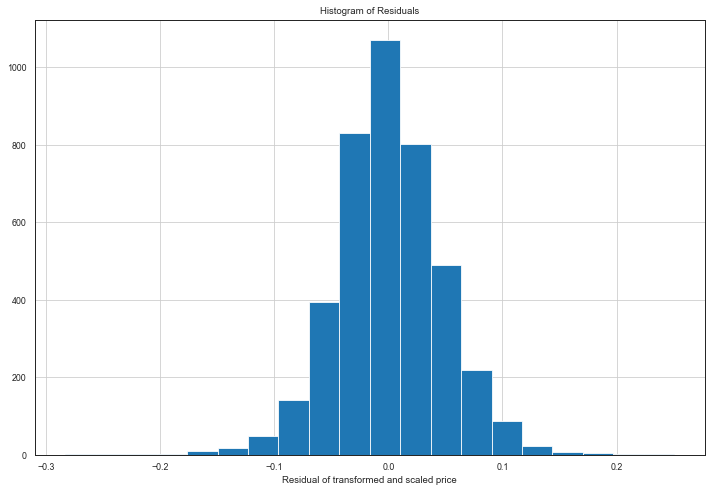

In [325]:
residuals.hist(bins = 20, figsize = (12,8))
plt.title('Histogram of Residuals')
plt.xlabel('Residual of transformed and scaled price')
plt.show()

Great, the residuals are in fact normally distributed. I'm curious about how the predictions look as compared to the actual data. I'll make a plot of that for the training set and the test set, and then I'll move on to making a function that predicts the price in dollars.

In [326]:
@interact
def residual_data_plot(Show = ['Train', 'Test']):
    df_dict = {'Train':[predictor_train, target_train],'Test':[predictor_test,target_test]}
    df_list = df_dict[Show]
    join = df_list[0].copy()
    join['Price'] = df_list[1]
    join.sort_values('Price', inplace = True)
    y_hat = res.predict(join.drop(labels = 'Price', axis = 1))
    MSE = np.mean(np.square(join.Price-y_hat))
    RMSE = np.sqrt(MSE)
    
    # Plot ordered y and y_hat
    fig, ax = plt.subplots(1,1,figsize = (12,8))
    plt.plot(np.array(y_hat), 'bo', markersize = 0.5, label = 'Predicted Price')
    plt.plot(np.array(join.Price),'r-', label = 'Actual Price')
    plt.legend(prop = {'size':12})
    plt.xlabel('Houses Ordered by Price', fontdict = {'size':16})
    plt.ylabel('Transformed and Scaled Price', fontdict = {'size':16})
    title = 'Difference between actual and predicted price in the ' + Show.lower() + ' dataset'
    plt.title(title, fontdict = {'size':18})
    RMSE_text = 'RMSE: {:1.4f}'.format(RMSE)
    plt.text(.025, 
             0.89, 
             RMSE_text, 
             horizontalalignment='left',
             verticalalignment='top',
             fontsize = 14,
             transform=ax.transAxes)
    plt.show()
    

interactive(children=(Dropdown(description='Show', options=('Train', 'Test'), value='Train'), Output()), _dom_…

In [327]:
def predict_price(df, alpha = 0.05, kind = 'mean'):
    # Transform the data
    df_transformed = transform_data(df)
    
    # Normalize the data
    kct = kc_transformed.copy()
    scale_factors = {'Bedrooms':{'min':kct.Bedrooms.min(), 'max':kct.Bedrooms.max()},
                     'Bathrooms':{'min':kct.Bathrooms.min(), 'max':kct.Bathrooms.max()},
                     'Grade':{'min':kct.Grade.min(), 'max':kct.Grade.max()},
                     'Sqft_Above':{'min':kct.Sqft_Above.min(), 'max':kct.Sqft_Above.max()}, 
                     'Sqft_Basement':{'min':kct.Sqft_Basement.min(), 'max':kct.Sqft_Basement.max()},
                     'Zipcode_Means':{'min':kct.Zipcode_Means.min(), 'max':kct.Zipcode_Means.max()},
                     'Living_Difference': {'min':kct.Living_Difference.min(), 'max':kct.Living_Difference.max()}}
    
    df_transformed_scaled = df_transformed.copy()
    to_scale = df_transformed_scaled.columns
    for column in list(to_scale):
        data = df_transformed_scaled[column]
        df_transformed_scaled[column] = (data - kct[column].min())/(kct[column].max()-kct[column].min())
    
    # Obtain the price interval
    if kind.lower() == 'mean':
        columns = ['mean', 'mean_ci_lower', 'mean_ci_upper']
    elif kind.lower() == 'obs':
        columns = ['mean', 'obs_ci_lower', 'obs_ci_upper']
    else:
        raise Exception('Kind can only be "mean" or "obs".')
        
    predictions = res.get_prediction(df_transformed_scaled).summary_frame(alpha = alpha)
    predictions = predictions.loc[:,columns]
    predictions.columns = ['Prediction','Lower Price Boundary','Upper Price Boundary']
    
    # Denormalize the price interval (also hardcoded based on the dataset)
    predictions = predictions*(kct.Price.max()-kct.Price.min())+kct.Price.min()
    
    # Transform the price interval and return
    predictions = 10**predictions
    predictions['id'] = df.index
    predictions.set_index('id')
    
    return predictions.join(df, on = 'id').set_index('id')

In [335]:
10**(0.11*(kc_transformed.Price.max()-kc_transformed.Price.min())+kc_transformed.Price.min())

129264.1742323458

In [331]:
pred_df = predict_price(kc,alpha = 0.25, kind = 'obs')
pred_df.head()

,Prediction,Lower Price Boundary,Upper Price Boundary,Price,Bedrooms,Bathrooms,Waterfront,View,Grade,Sqft_Above,...,August,December,February,January,July,June,March,May,November,October
id,,,,,,,,,,,,,,,,,,,,,
7129300520,228918.617439,178759.953023,293151.416321,221900.0,3,1.00,0,0,7,1180,...,0,0,0,0,0,0,0,0,0,1
6414100192,542867.814938,423811.077170,695369.895621,538000.0,3,2.25,0,0,7,2170,...,0,1,0,0,0,0,0,0,0,0
5631500400,225212.535814,175865.490911,288406.133717,180000.0,2,1.00,0,0,6,770,...,0,0,1,0,0,0,0,0,0,0
2487200875,428677.488160,334738.237666,548979.376055,604000.0,4,3.00,0,0,7,1050,...,0,1,0,0,0,0,0,0,0,0
1954400510,541437.289429,422805.174849,693355.606370,510000.0,3,2.00,0,0,8,1680,...,0,0,1,0,0,0,0,0,0,0


In [329]:
(((pred_df['Upper Price Boundary']-pred_df['Lower Price Boundary'])/2)).median()

111153.5675664182

The function `predict_price` provides a range of prices based on the input parameters. An interval for the mean price of a house with a set of attributes can be obtained by passing `kind = 'mean'`, whereas a predictive interval for a single observation can be obtained by passing `kind = 'obs'`.

I can use the results of the prediction in order to plot the the performance in real prices, instead of in transformed and scaled prices.

In [332]:
@interact
def residual_data_plot(Fraction = (0.1,1,0.05)):
    sample = pred_df.sample(frac = Fraction)
    sample.sort_values(by = 'Price', inplace = True)
    MSE = np.mean(np.square(sample.Price-sample.Prediction))
    RMSE = np.sqrt(MSE)
    rRMSE = RMSE / sample.Price.mean()
    
    # Plot ordered y and y_hat
    fig, ax = plt.subplots(1,1,figsize = (12,8))
    plt.plot(np.array(sample.Prediction), 'bo', markersize = 0.5, label = 'Predicted Price')
    plt.plot(np.array(sample.Price),'r-', label = 'Actual Price')
    plt.legend(prop = {'size':12})
    plt.xlabel('Houses Ordered by Price', fontdict = {'size':16})
    plt.ylabel('Price', fontdict = {'size':16})
    title = 'Difference between actual and predicted price in a random sample'
    plt.title(title, fontdict = {'size':18})
    rRMSE_text = 'rRMSE: {:1.4f}'.format(rRMSE)
    plt.text(.025, 
             0.89, 
             rRMSE_text, 
             horizontalalignment='left',
             verticalalignment='top',
             fontsize = 14,
             transform=ax.transAxes)
    plt.yscale('log')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.show()

interactive(children=(FloatSlider(value=0.55, description='Fraction', max=1.0, min=0.1, step=0.05), Output()),…

<a id="5"></a>
## 5. Interpreting the Results

The final model has relatively low rRMSE and a tight confidence interval of the average price of a house with a set of features, but its predictive ability for any particular house is poor. This is not surprising because MLR does not take into account the nuances that exist at the individual coefficient level. For example, it is folly to assume that the price per square foot is the same in every zipcode. Models that can take this nuance into account exist. They are called hierarchical models and are based on bayesian approaches to model the parameters of the data.

In any case, this model still has significant value. It is clear that location is the most important predictor. The zipcode where a house is located accounts for the majority of the price of the house in some cases. This is also true of houses on the waterfront, whose final price is estimated to be ~\$129,000 more expensive than houses not on the water. Interestingly, neither the number of bedrooms nor the number of bathrooms appears in the model. This is likely because these values are highly correlated with Grade and Area Above, both of which are next most impactful after the zipcode average.